Deployment

In [1]:
#!pip install lifelines

In [2]:
#Importing Necessary Libraries
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('rainbow')

In [3]:
#Load the Dataset
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Spell is referring to time
Time= df.Pregnancies
Time

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: int64

In [7]:
#Initiating the KaplanMeierFitter model
kmf= KaplanMeierFitter()

<Axes: xlabel='timeline'>

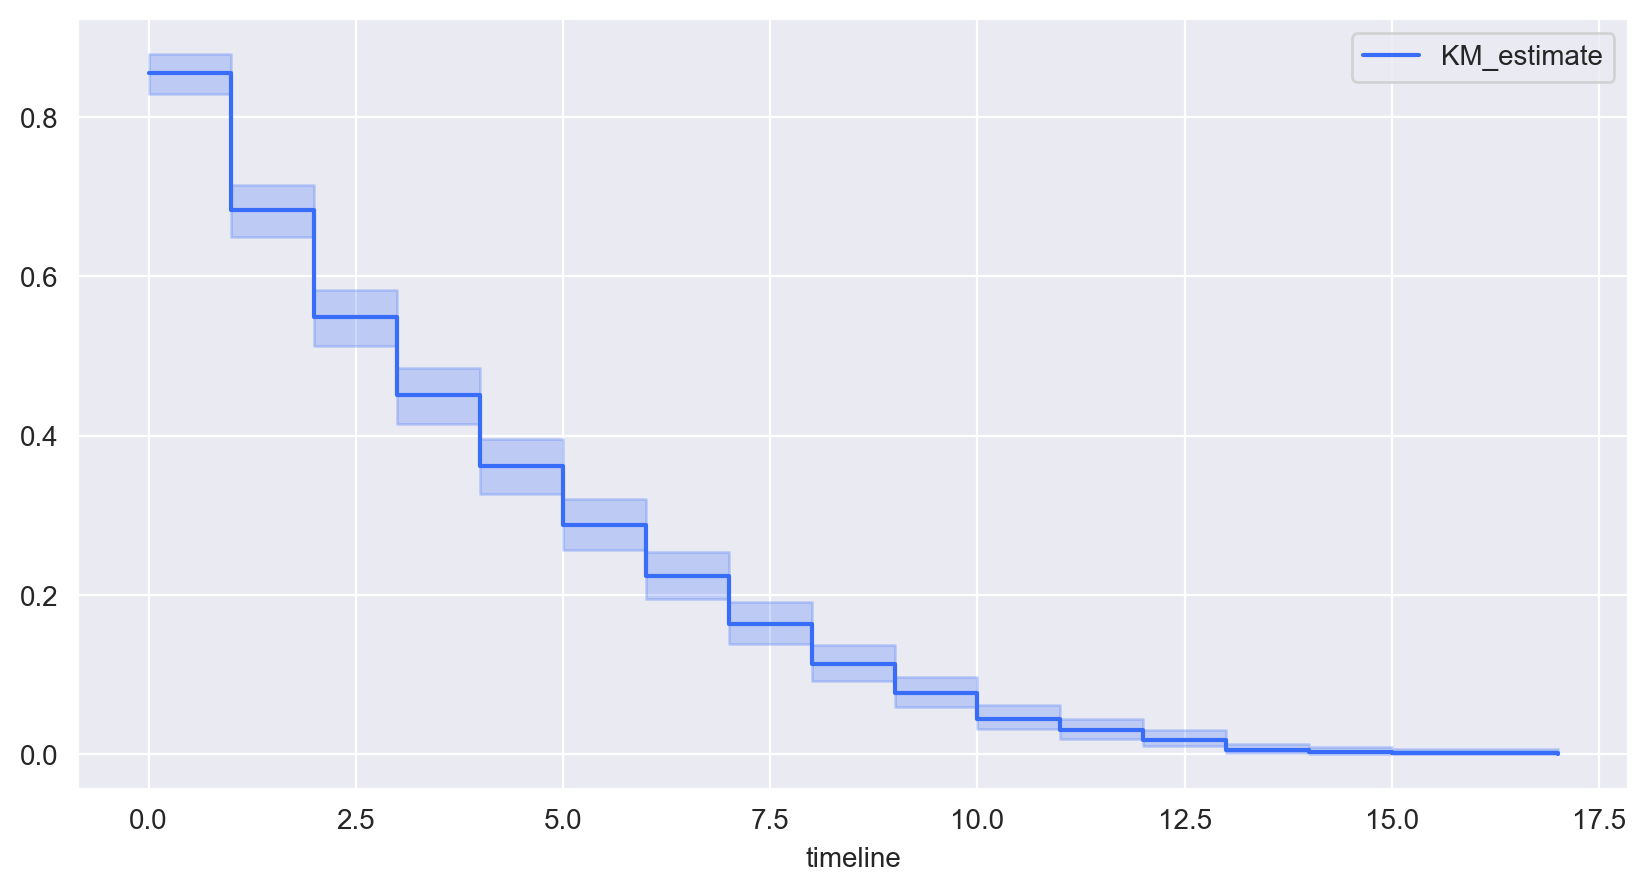

In [8]:
#Fitting KaplanMeierFitter model on Time and Events for Ash
kmf.fit(Time,event_observed=df.Glucose)
#Time line estimations plot
kmf.plot()

In [9]:
#Over multiple groups
#For each group, here group is SkinThickness
df.Glucose.value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [10]:
Time[df.BMI==1]

Series([], Name: Pregnancies, dtype: int64)

<Axes: xlabel='timeline'>

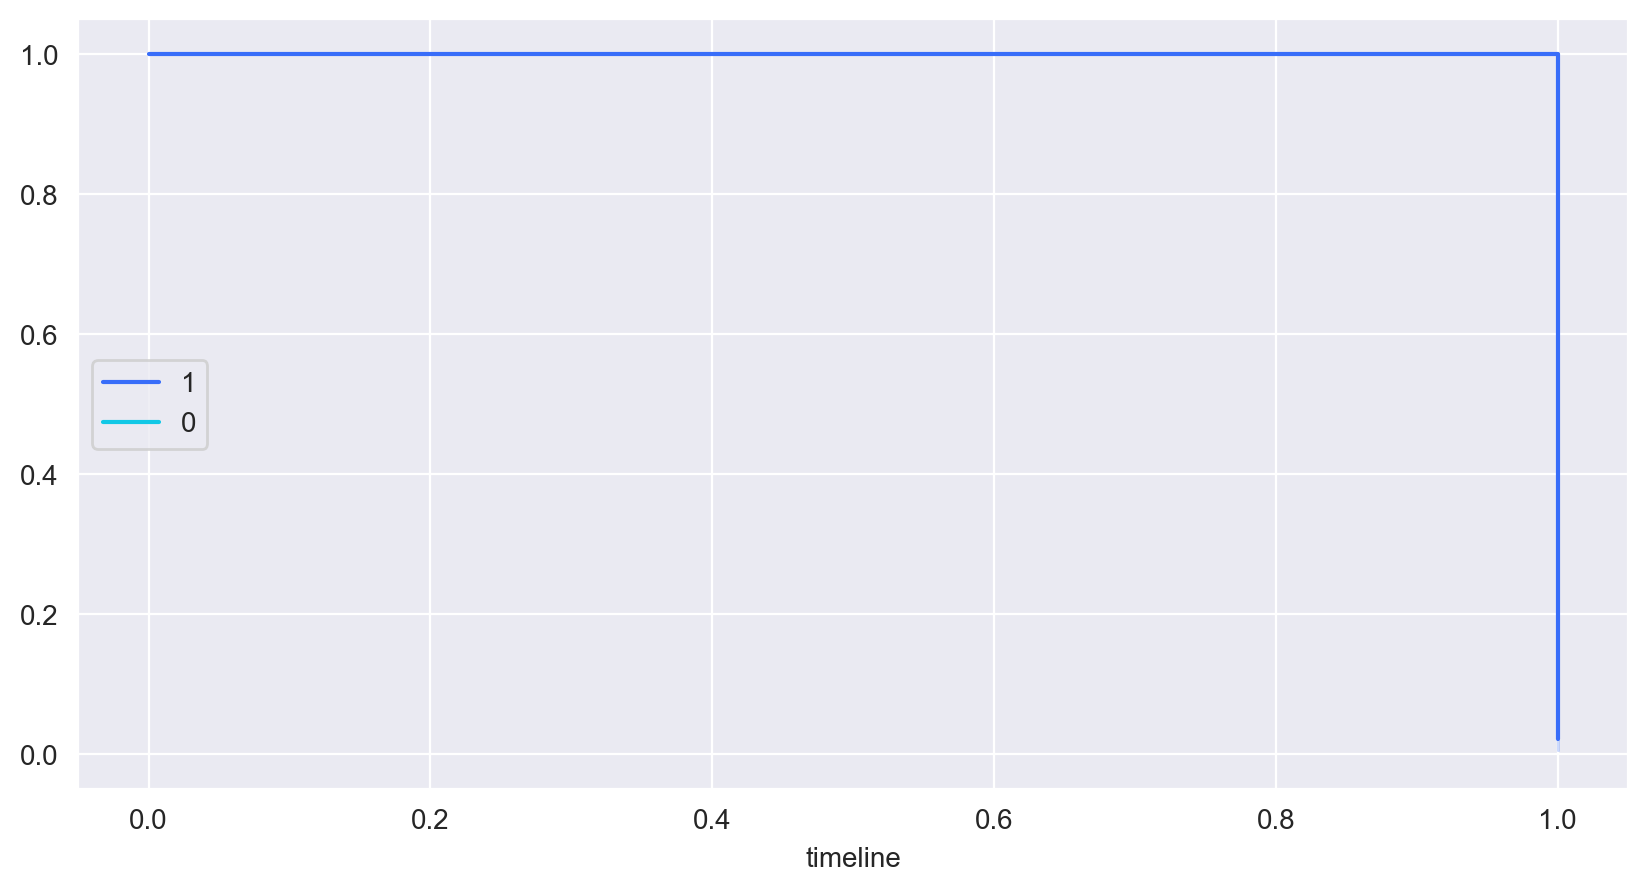

In [12]:
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(Time[df.Pregnancies==1], df.Glucose[df.Pregnancies==1], label='1')
ax = kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(Time[df.Pregnancies==0], df.Glucose[df.Pregnancies==0], label='0')
kmf.plot(ax=ax)